# Библиотеки

In [1]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from matplotlib.ticker import NullLocator, LinearLocator, MultipleLocator, IndexLocator, FixedLocator, LogLocator, MaxNLocator
from matplotlib.ticker import NullFormatter, FormatStrFormatter, FuncFormatter, ScalarFormatter, FixedFormatter
from matplotlib.lines import Line2D
from matplotlib.patches import *
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation
from matplotlib.animation import ArtistAnimation


from PIL import Image
import os
import numpy
import random as rn
import time
import numpy as np
from scipy.interpolate import RBFInterpolator, InterpolatedUnivariateSpline

# plot для построения и оформления двумерных графиков

plot(x, y, '--\-.\:', color='',  marker='', markerfacecolor='' 

все настройки можно изменить с помощью setp

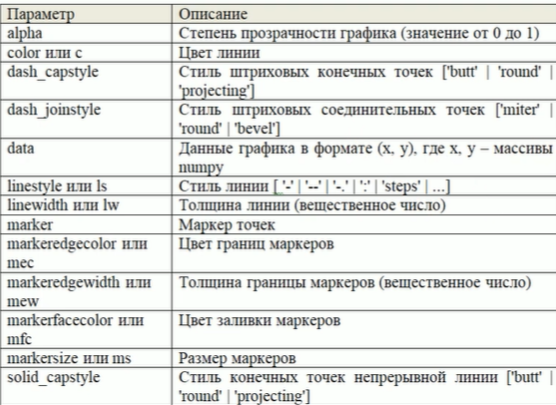
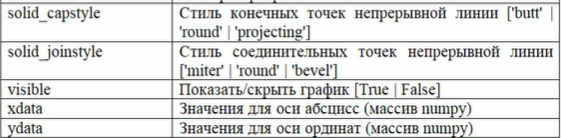

In [2]:
def generate_rnnums(quan=10, borders=(-10, 10)):
    return [rn.randint(borders[0], borders[1]) for _ in range(quan)]

def generate_nums(borders=(0, 10)):
    return [i for i in range(borders[0], borders[1])]

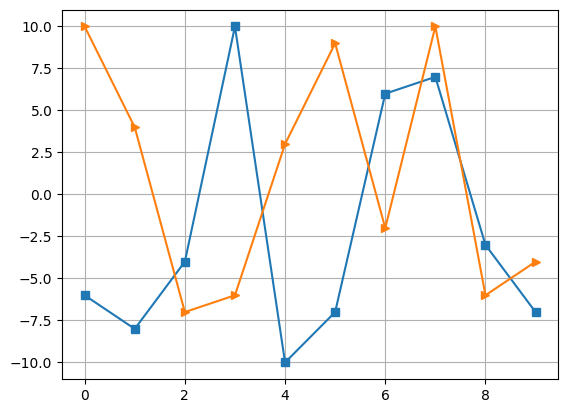

In [3]:
# graf = plt.plot(generate_nums(), generate_rnnums(), generate_nums(), generate_rnnums(), color='g') # устанавливает цвет всех графиков...

graf = plt.plot(generate_nums(), generate_rnnums(), 's-', generate_nums(), generate_rnnums(), '>-',
               ) # устанавливает цвет всех графиков..
# # plt.setp(graf, linestyle='--') # установка типа линий по умолчанию
plt.grid()
plt.show()



## Заливка областей графиков

fill_between(x, y, x2, y2, interpolate, step) - тип две кривые мужду которыми заливка

чтобы закрасить по условию, y -  должна быть функцией от х, потому что where не работает с масивами

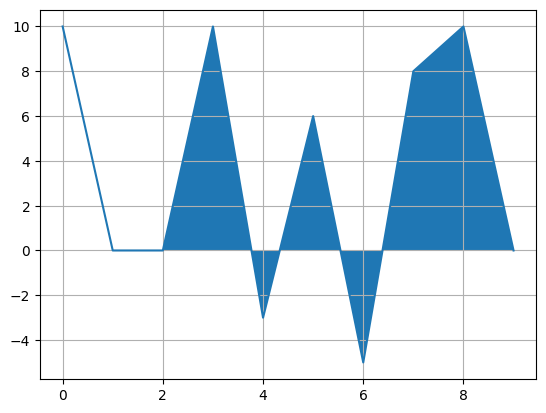

In [4]:
x1, x2 = generate_rnnums(), generate_rnnums()
y = numpy.array(generate_nums())

line = plt.plot(x1)
line = plt.fill_between(y, x1, where=(y > 1))
plt.grid()

# Несколько координатных осей

## subplot
subplot(nrows, ncols, index)
index - индекс текущих осей

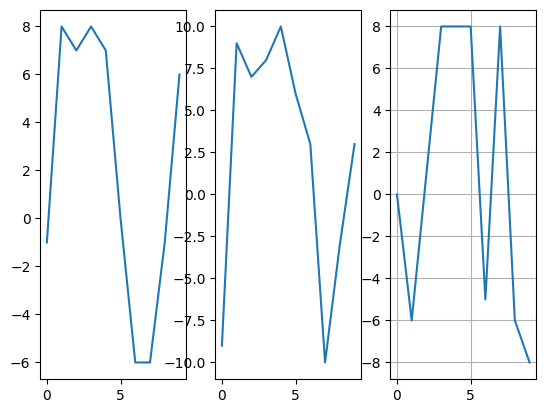

In [5]:
for i in range(1, 4):
    plt.subplot(1, 3, i)
    plt.plot(generate_rnnums())

plt.grid()

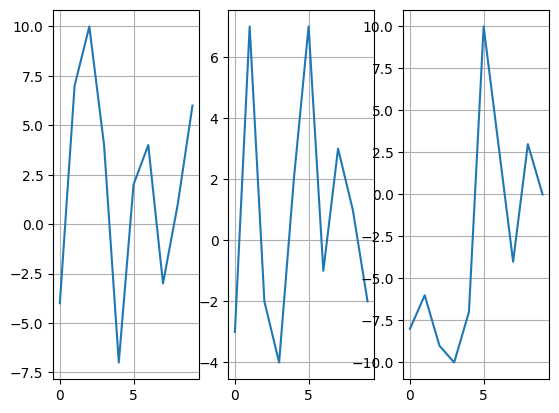

In [6]:
# типа ооп да

ax1 = plt.subplot(1, 3, 1)
plt.plot(generate_rnnums())

ax2 = plt.subplot(1, 3, 2)
plt.plot(generate_rnnums())

ax3 = plt.subplot(1, 3, 3)
plt.plot(generate_rnnums())


ax1.grid()
ax2.grid()
ax3.grid()

In [7]:
x1 = generate_rnnums()
x2 = generate_rnnums()
x3 = generate_rnnums()
x4 = generate_rnnums()
x5 = generate_rnnums()
x6 = generate_rnnums()
x7 = generate_rnnums()

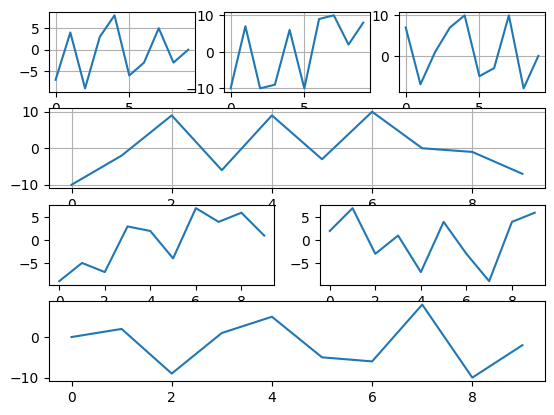

In [8]:
# такие цифры потому что используем такое разбиение - две строки и для каждой строки свое разбиение по столбцам
# если столбец 1 - указываем строку
# если столбцов несколько - порядковый номер графика

ax1 = plt.subplot(4, 3, 1) # ось = 1 столб = 1, 2, 3 - третье число ось + столб - 1
plt.plot(x1)

ax2 = plt.subplot(4, 3, 2)
plt.plot(x2)

ax3 = plt.subplot(4, 3, 3)
plt.plot(x3)

ax4 = plt.subplot(4, 1, 2) # индекс 2 потому что... чё? ось с индесом 1 будет находиться где и три графика...
plt.plot(x4)

ax5 = plt.subplot(4, 2, 5)
plt.plot(x5)

ax6 = plt.subplot(4, 2, 6)
plt.plot(x6)

ax7 = plt.subplot(4, 1, 4) 
plt.plot(x7)

ax1.grid()
ax2.grid()
ax3.grid()
ax4.grid()

## subplots

NameError: name 'x1' is not defined

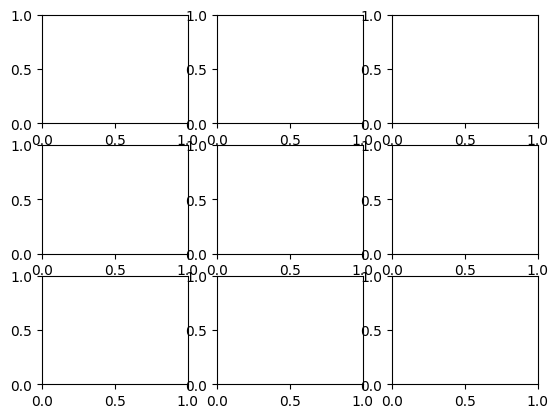

In [3]:
# то же, но более удобным методом
import matplotlib.pyplot as plt
f, ax = plt.subplots(3, 3)

ax[0, 0].plot(x1)
ax[0, 0].grid()

#f - все функции https://matplotlib.org/stable/api/figure_api.html
plt.show()

## отдельное окно

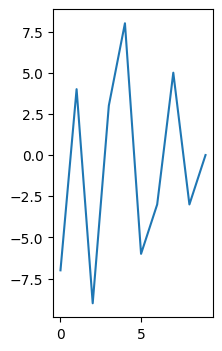

In [10]:
# можно сделать отдельно окно

fig = plt.figure(figsize=(7,4)) # не работает из за тупого юпитера
# ax1 = fig.add_axes([0, 0, 1, 0.5]) # сами создаем ось и определяем доли от всего окна
ax = fig.add_subplot(1, 3, 1)

ax.plot(x1)
plt.show()

## Компоновка графиков gridspec

что то типа маски с которой удобно работать

нужно отдельно ипортировать

подходит для сложной копановки

### по таблице

In [11]:
fig = plt.figure(figsize=(7, 4))
gs = GridSpec(ncols=3, nrows=2, figure=fig)

<Figure size 700x400 with 0 Axes>

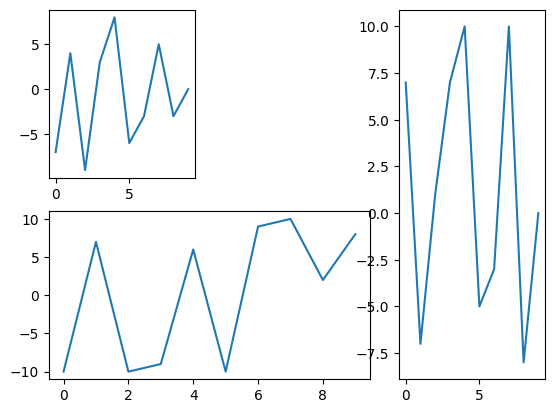

In [12]:
ax1 = plt.subplot(gs[0, 0])
ax1.plot(x1)
ax2 = plt.subplot(gs[1, 0:2])
ax2.plot(x2)
ax3 = plt.subplot(gs[:, 2])
ax3.plot(x3)


### свои размеры

In [13]:
ws = [1, 2, 5] # какую долю ширины от sum(ws) будет заимать столбец
hs = [2, 0.5]

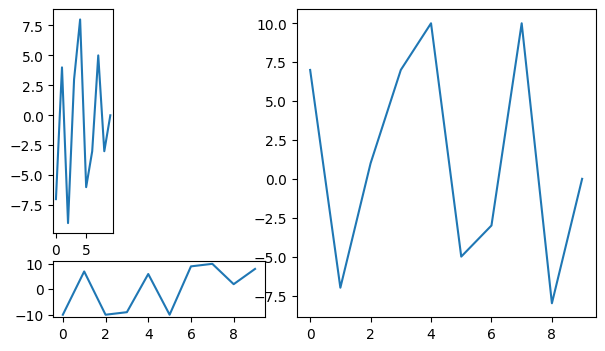

In [14]:
fig = plt.figure(figsize=(7, 4))
gs = GridSpec(ncols=3, nrows=2, figure=fig, width_ratios=ws, height_ratios=hs)

ax1 = plt.subplot(gs[0, 0])
ax1.plot(x1)
ax2 = plt.subplot(gs[1, 0:2])
ax2.plot(x2)
ax3 = plt.subplot(gs[:, 2])
ax3.plot(x3)

# Расположение меток - тики, граничные значения графиков

## Границы

[(-10.0, 10.0), (-5.0, 15.0)]

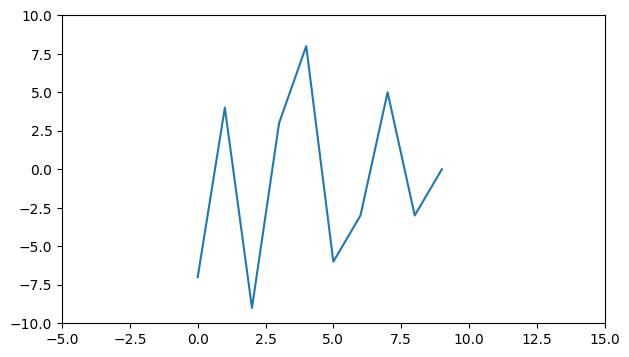

In [15]:
fig = plt.figure(figsize=(7, 4))
ax = fig.add_subplot()
ax.plot(x1)

ax.set(ylim=(-10, 10), xlim=(-5, 15))
# ax.set_xlim(xmin=, xmax=) # можно задать одну границу, о можно без наименований


## Тики

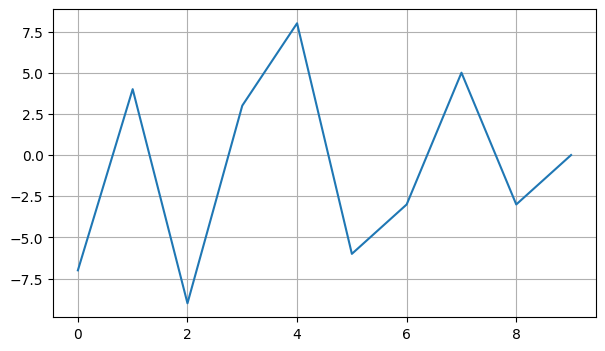

In [16]:
fig = plt.figure(figsize=(7, 4))
ax = fig.add_subplot()
ax.plot(x1)

loc = 6

match loc:
    case 0: lc = NullLocator() # убирает метки
    case 1: lc = LinearLocator(5) # задает нужное число меток 
    case 2: lc = MultipleLocator(base=1) # равное растояние от 0
    case 3: lc = IndexLocator(base=0.5, offset=0) # то же, но от пределенного числа
    case 4: lc = FixedLocator([-1, 0, 4.5]) # устанавливает риски в нужных точках
    case 5: lc = LogLocator(base=2) # 2 ** (номер риски)
    case 6: lc = MaxNLocator(5) # максимальное желаемое число рисок

ax.grid()
ax.xaxis.set_major_locator(lc) #yaxis

## Минорная сетка

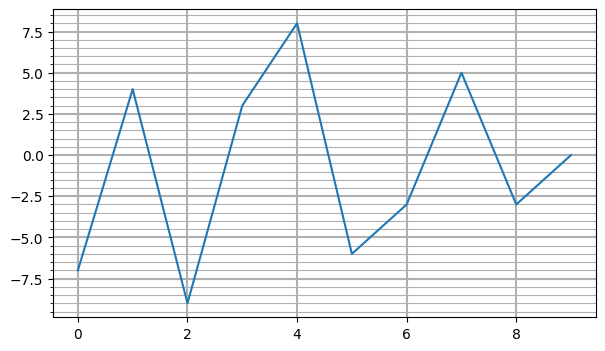

In [17]:
fig = plt.figure(figsize=(7, 4))
ax = fig.add_subplot()
ax.plot(x1)

ax.minorticks_on()
ax.grid(which='major', lw=1.5)
ax.grid(which='minor')

ax.xaxis.set_minor_locator(NullLocator()) # убрали миноркую етку по х




## Доп - удаление меток

ax.set_xticklabels([])

# Формат отображения меток - форматоры

C:\Users\user\AppData\Local\Temp\ipykernel_14860\2655798181.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.xaxis.set_major_formatter(f)


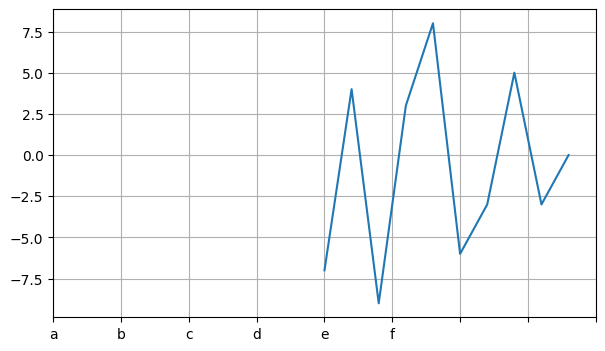

In [18]:
def formatOx(x, position):
    return f'[{x}]' if x < 0 else f'({x})'

fig = plt.figure(figsize=(7, 4))
ax = fig.add_subplot()
ax.plot(x1)

i = 4
match i:
    case 0: f = NullFormatter() # удаляет тики
    case 1: f = FormatStrFormatter("y=%.3f") #округляет до %d - целых %.nf - n чисел после точек
    case 2: f = FuncFormatter(formatOx) # вызывает функцию
    case 3: 
        f = ScalarFormatter() 
        f.set_powerlimits((-4, 4)) #с какого момента выносится степень
        # чтобы применить ко всем графикам - matplotlib.rcParams['axe.formatter.limits'] = (-n, m)
    case 4: f = FixedFormatter(['a', 'b', 'c', 'd', 'e', 'f']) # приваиваем имена рискам - можно и цифры
    # case 5: f =


ax.set_xlim(-10, 10)
ax.xaxis.set_major_formatter(f)
ax.grid()

# Логарифмический масштаб

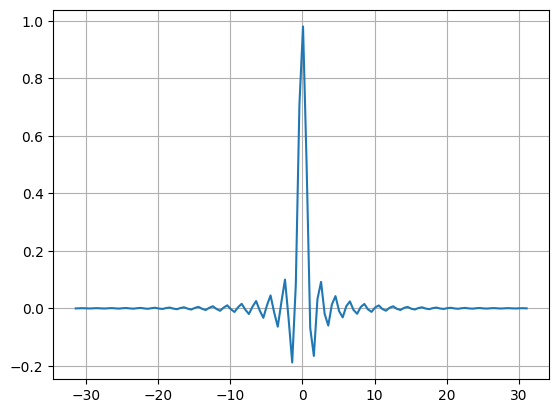

In [19]:
fig = plt.figure()
ax = fig.add_subplot()

x = numpy.arange(-10 * numpy.pi, 10* numpy.pi, 0.5)
ax.plot(x, numpy.sinc(x) * numpy.exp( -numpy.abs(x/10)))

ax.grid()

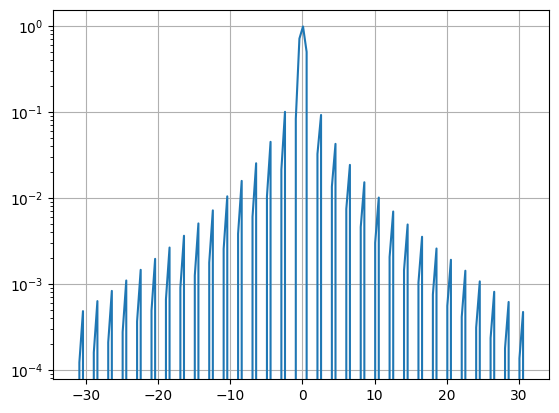

In [20]:
fig = plt.figure()
ax = fig.add_subplot()
x = numpy.arange(-10 * numpy.pi, 10* numpy.pi, 0.5)
ax.semilogy(x, numpy.sinc(x) * numpy.exp( -numpy.abs(x/10)))

ax.grid()


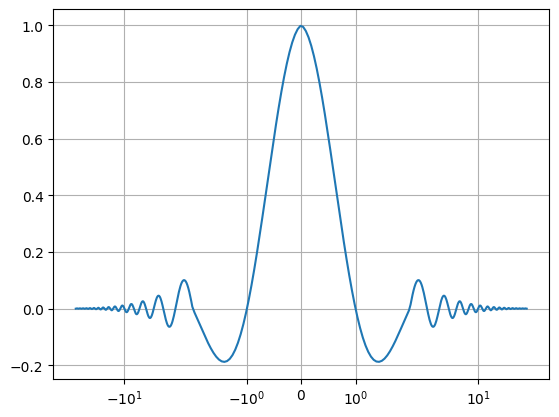

In [21]:
fig = plt.figure()
ax = fig.add_subplot()

x = numpy.arange(-10 * numpy.pi, 10* numpy.pi, 0.05)
ax.plot(x, numpy.sinc(x) * numpy.exp( -numpy.abs(x/10)))

# ax.set_yscale('log', base=10) # linear, log, symlog - сначала линейный потомлогарифмический

# дополнительно можно прописать subs=[] - покажет дополнительные желаемые риски
ax.set_xscale('symlog', linthresh=2)

ax.grid()

# Размещение текста

## Сетка

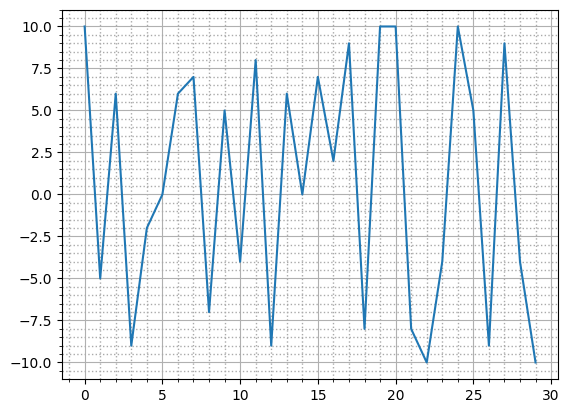

In [22]:
x = generate_rnnums(30)

fig = plt.figure()
ax = fig.add_subplot()

ax.plot(x)

ax.grid()
ax.minorticks_on()
ax.grid(which='minor', color='#aaa', linewidth=1, ls=':')

## Тексты

У оси - title, xlabel, text, annotate

У окна - subtitle, figtext

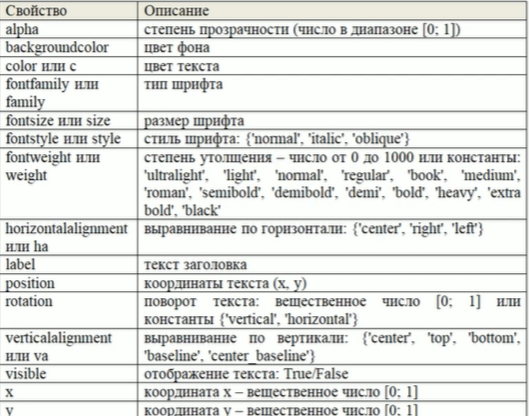

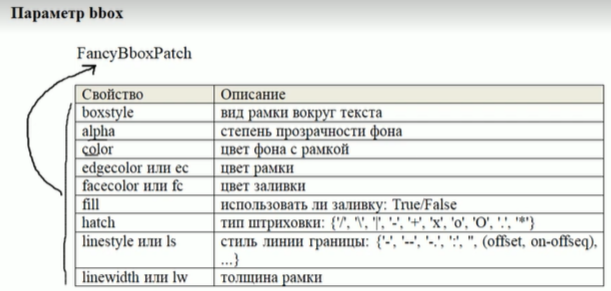

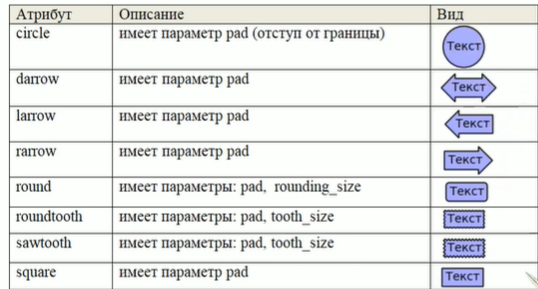

[None]

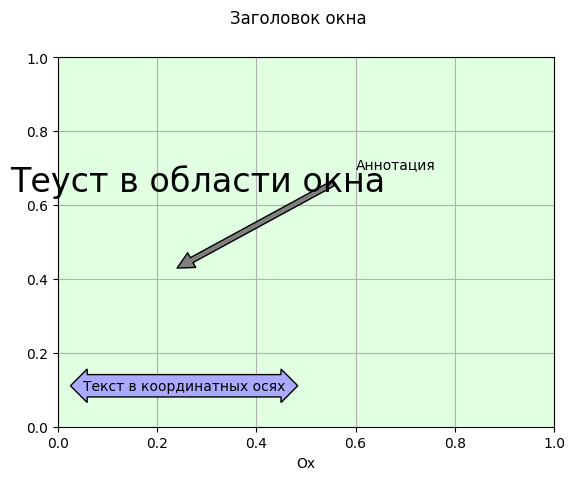

In [23]:
x = generate_rnnums(30)

fig = plt.figure()
ax = fig.add_subplot()
# ax.plot(x)
plt.figtext(0.05, 0.6, 'Теуст в области окна', fontsize=24)
fig.suptitle('Заголовок окна')
ax.set_xlabel('Ox')
ax.text(0.05, 0.1, 'Текст в координатных осях', bbox={'boxstyle': 'darrow', 'facecolor':'#AAAAFF'})
ax.annotate('Аннотация', xy=(0.2, 0.4), xytext=(0.6, 0.7), arrowprops={'facecolor': 'gray', 'shrink': 0.1})
ax.grid()
ax.set(facecolor='#AAFFAA5A')

# Легенда

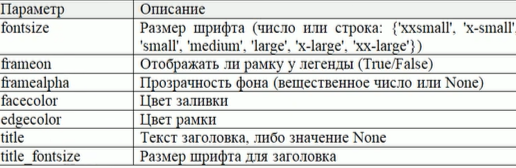

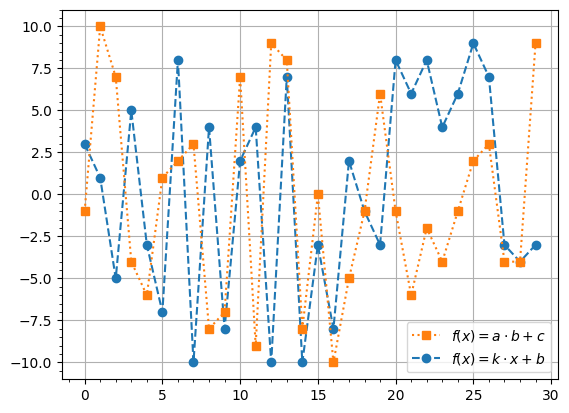

In [24]:
x1 = generate_rnnums(30)
x2 = generate_rnnums(30)

fig = plt.figure()
ax = fig.add_subplot()

line1, = ax.plot(x1, '--o', label='x1')
line2, = ax.plot(x2, ':s', label='x2')

# ax.legend((line2, line1),['line1name', 'line2name'], loc='upper right') #дальше для места легенды
# best, upper/lower/center right/left/center
# bbox_to_anchor=(0.1, 1)
#можно использовать yjnfwb. тех
ax.legend((line2, line1),[r'$f(x) = a \cdot b + c$', r'$f(x) = k \cdot x + b$'])
ax.grid()
ax.minorticks_on()

# Фигуры на графике

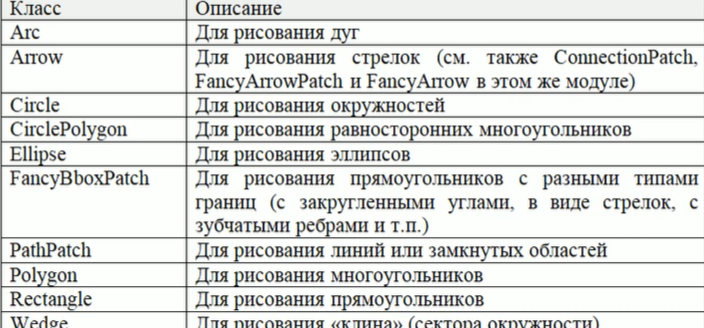

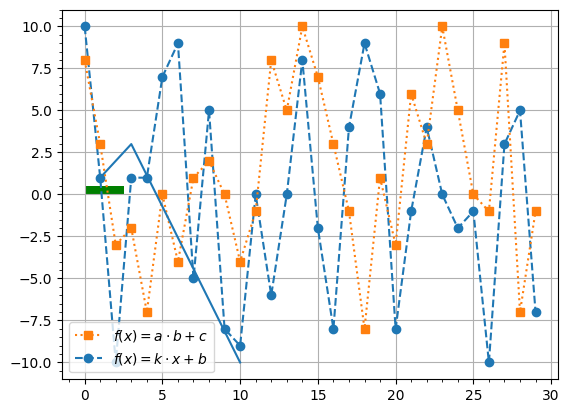

In [25]:
x1 = generate_rnnums(30)
x2 = generate_rnnums(30)

l1 = Line2D([1, 2, 3, 10], [1, 2, 3, -10]) # ломаная [x], [y]
# фигура, которая накладывается на график

fig = plt.figure()
ax = fig.add_subplot()

line1, = ax.plot(x1, '--o', label='x1')
line2, = ax.plot(x2, ':s', label='x2')

rect = Rectangle((0, 0), 2.5, 0.5, facecolor='g') # 0, l, h

ax.legend((line2, line1),[r'$f(x) = a \cdot b + c$', r'$f(x) = k \cdot x + b$'])
ax.grid()
ax.add_patch(rect)
ax.add_line(l1) # игнорируется при определении границ
ax.minorticks_on()

# Другие графики

## Ступенчаты

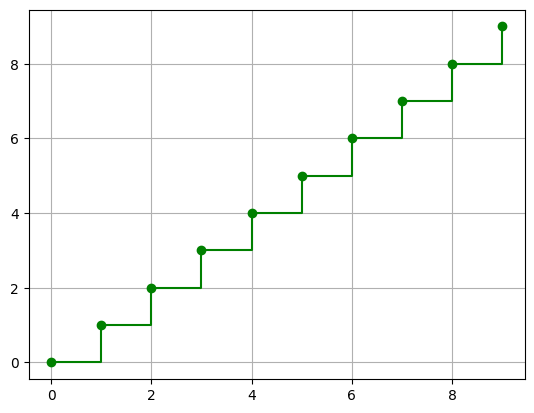

In [26]:
x = generate_rnnums(30)
y = generate_nums((0, 10))

fig = plt.figure()
ax = fig.add_subplot()

ax.step(y, y, '-go', where='post') # для изменения дискретных величин
# pre, post, mid
ax.grid()

## Стековый

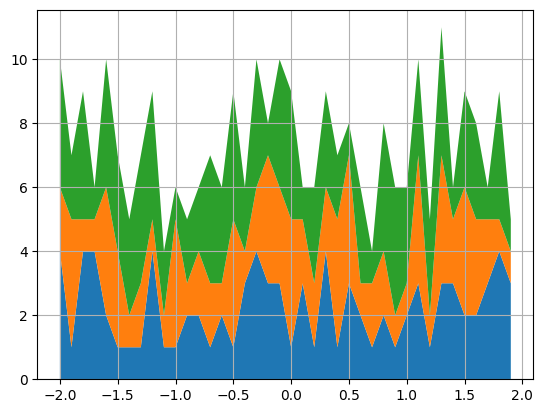

In [27]:
y = np.arange(-2, 2, 0.1)

x1 = generate_rnnums(len(y), borders=(1, 4)) 
x2 = generate_rnnums(len(y), borders=(1, 4)) 
x3 = generate_rnnums(len(y), borders=(1, 4)) 



fig = plt.figure()
ax = fig.add_subplot()
ax.grid()

ax.stackplot(y, x1, x2, x3)

## Stem

<StemContainer object of 3 artists>

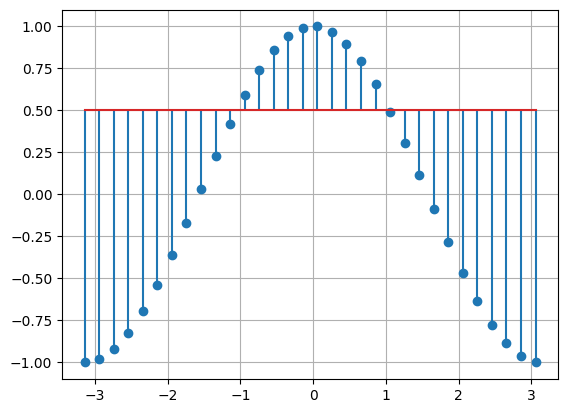

In [28]:
fig = plt.figure()
ax = fig.add_subplot()
ax.grid()

x = np.arange(-np.pi, np.pi, 0.2)
ax.stem(x, np.cos(x), bottom=0.5)

## Точечный

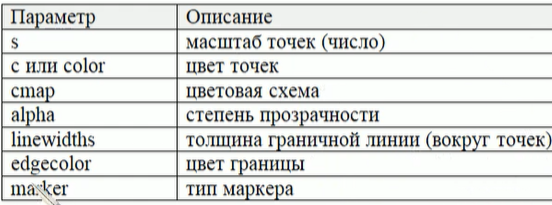

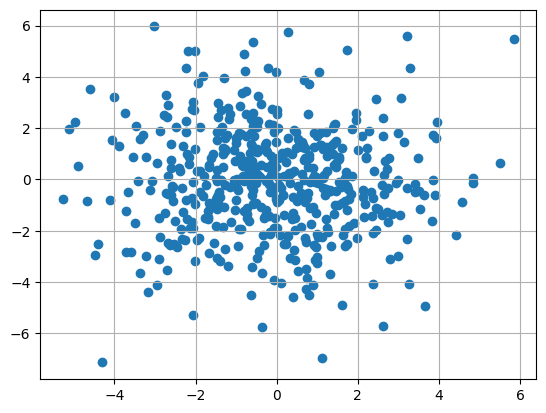

In [29]:
fig = plt.figure()
ax = fig.add_subplot()
ax.grid()

x = np.random.normal(0, 2, 500) #0 матожидание, 2 - дисперсия?
y = np.random.normal(0, 2, 500)

ax.scatter(x, y)

## Гистограмма

(array([  1.,   2.,   5.,   5.,  14.,  10.,  22.,  44.,  46.,  74.,  73.,
        120., 134., 182., 218., 223., 262., 276., 309., 339., 334., 322.,
        326., 283., 262., 242., 190., 157., 127., 109.,  98.,  61.,  29.,
         36.,  27.,  20.,   8.,   4.,   2.,   4.]),
 array([-6.73425892, -6.40462755, -6.07499619, -5.74536482, -5.41573345,
        -5.08610208, -4.75647072, -4.42683935, -4.09720798, -3.76757661,
        -3.43794525, -3.10831388, -2.77868251, -2.44905114, -2.11941977,
        -1.78978841, -1.46015704, -1.13052567, -0.8008943 , -0.47126294,
        -0.14163157,  0.1879998 ,  0.51763117,  0.84726253,  1.1768939 ,
         1.50652527,  1.83615664,  2.165788  ,  2.49541937,  2.82505074,
         3.15468211,  3.48431348,  3.81394484,  4.14357621,  4.47320758,
         4.80283895,  5.13247031,  5.46210168,  5.79173305,  6.12136442,
         6.45099578]),
 <BarContainer object of 40 artists>)

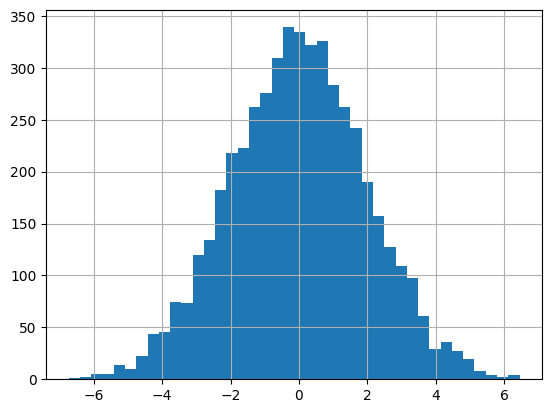

In [30]:
fig = plt.figure()
ax = fig.add_subplot()
ax.grid()

x = np.random.normal(0, 2, 5000)

ax.hist(x, bins=40)


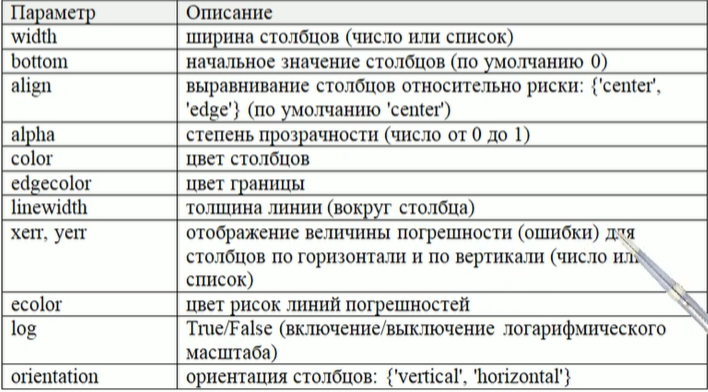

<BarContainer object of 10 artists>

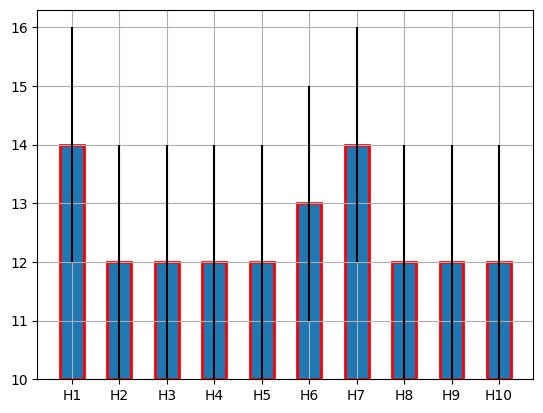

In [31]:
fig = plt.figure()
ax = fig.add_subplot()
ax.grid()

x = [f'H{i+1}' for i in range(10)]
y = np.random.randint(1, 5, len(x))

ax.bar(x, y, width=0.5, linewidth=2, edgecolor='r', yerr=2, bottom=10) # черная линя - yerr  аля ошибка при счете

<BarContainer object of 39 artists>

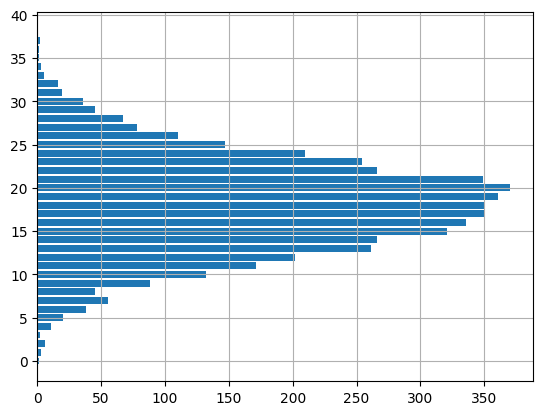

In [32]:
fig = plt.figure()
ax = fig.add_subplot()
ax.grid()

y = np.random.normal(0, 2, 5000)
x = np.linspace(np.min(y), np.max(y), 40)
bars = [len(y[np.bitwise_and(y >= x[i], y < x[i+1])]) for i in range(len(x)-1)]

ax.barh(range(len(x-1) - 1), bars)

<BarContainer object of 10 artists>

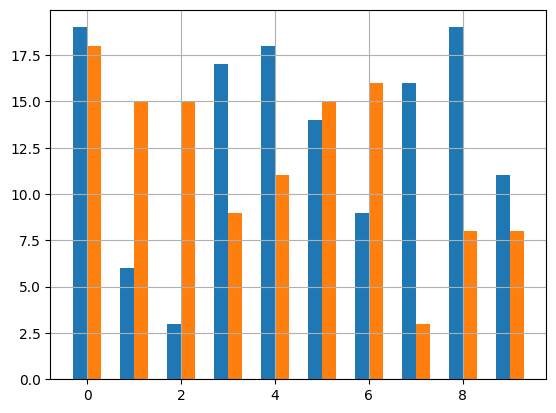

In [33]:
fig = plt.figure()
ax = fig.add_subplot()
ax.grid()

x = np.arange(10)
y1 = np.random.randint(3, 20, len(x))
y2 = np.random.randint(3, 20, len(x))

w = 0.3
ax.bar(x - w/2, y1, width=w)
ax.bar(x + w/2, y2, width=w)

## Круговые диаграммы

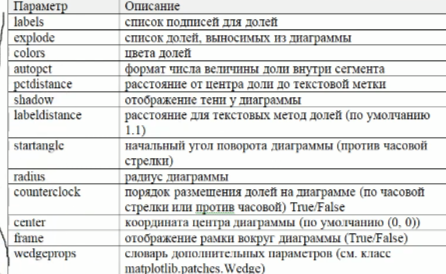

([<matplotlib.patches.Wedge at 0x1ef33f15630>,
 [Text(1.151391565459829, 0.3380790780098119, 'Toyota'),
  Text(-0.1850093554693993, 1.2867678649969456, 'BMW'),
  Text(-1.0250504052974734, -0.3990885448111559, 'Lexus'),
  Text(0.33991877217145827, -1.046162142464278, 'Audi'),
  Text(1.0780908383980825, -0.21844940870169383, 'Lada')],
 [Text(0.6716450798515669, 0.19721279550572357, '9.09'),
  Text(-0.11385191105809188, 0.791857147690428, '36.36'),
  Text(-0.5591184028895309, -0.217684660806085, '20.91'),
  Text(0.18541023936624995, -0.5706338958896061, '27.27'),
  Text(0.5880495482171358, -0.11915422292819662, '6.36')])

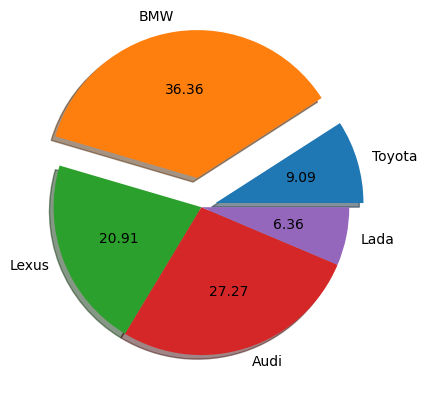

In [34]:
fig = plt.figure()
ax = fig.add_subplot()
ax.grid()

vals = [10, 40, 23, 30, 7]
labels = 'Toyota BMW Lexus Audi Lada'.split()

exp = (0.1, 0.2, 0, 0, 0)

ax.pie(vals, labels=labels, autopct='%.2f', explode=exp, shadow=True)

# Изображения

цветовые карты

Параметры imshow

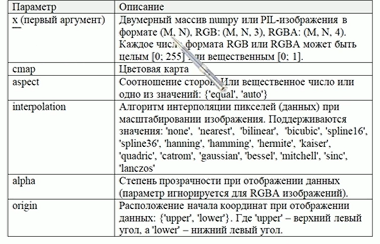

In [35]:
img = Image.open('zmey.jpeg')

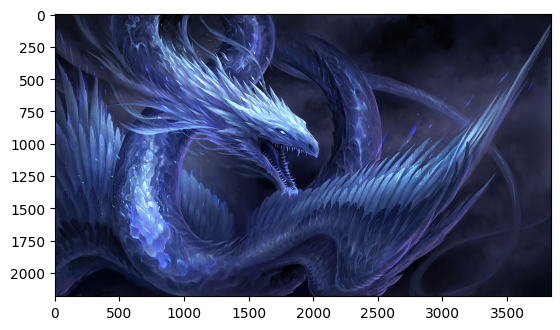

In [36]:
fig = plt.figure()
ax = fig.add_subplot()
ax.imshow(img) # нельзя изменить цветовую карту, НООООООООО

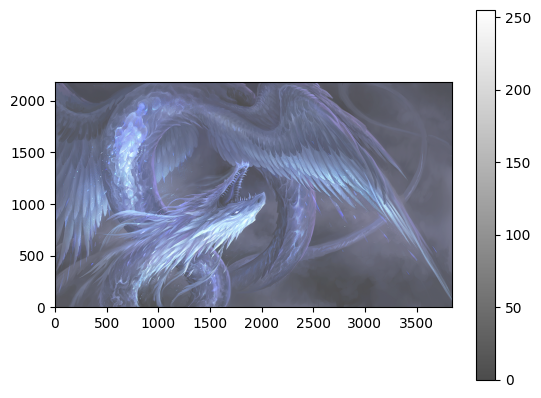

In [37]:
img = np.array(Image.open('zmey.png'))
b = plt.imshow(img, origin='lower', cmap='gray', aspect='equal', alpha=0.7) # должно работать...
plt.colorbar(b)               

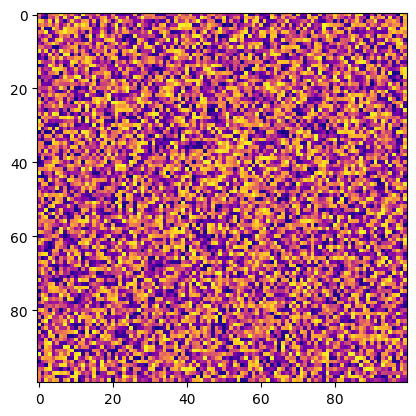

In [38]:
data = np.random.randint(0, 255, (100, 100)) #массив случайных чисел 100х100
plt.imshow(data, cmap='plasma') #цветовая карта

## Отображение цветовой сетки

pcolormesh (мб нессиметрично

Отображает именно сетку, джипеги и прочие нельзя

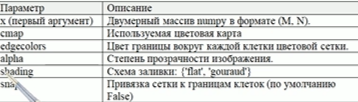

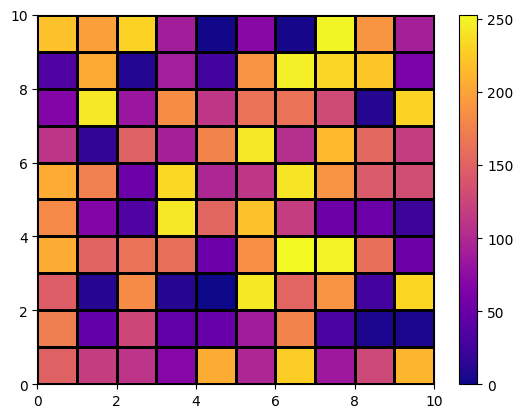

In [39]:
data = np.random.randint(0, 255, (10, 10)) #массив случайных чисел 100х100
b = plt.pcolormesh(data, edgecolor='black', cmap='plasma') #цветовая карта
plt.colorbar(b)

# Построение трехмерных графиков

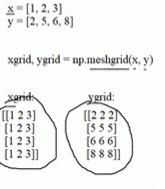

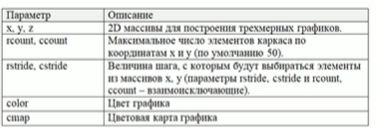

In [41]:
%matplotlib tk 

In [42]:
fig = plt.figure()
# ax_3d = Axes3D(fig)
ax_3d = fig.add_subplot(projection='3d')

x = np.linspace(0, 10, 50)
z = np.cos(x)
ax_3d.plot(x, x, z)

ax_3d.set_xlabel('x')
ax_3d.set_ylabel('y')
ax_3d.set_zlabel('z')

plt.show()

In [43]:
fig = plt.figure()
# ax_3d = Axes3D(fig)
ax_3d = fig.add_subplot(projection='3d')

x = np.arange(-2*np.pi, 2*np.pi, 0.2)
y = np.arange(-2*np.pi, 2*np.pi, 0.2)
xgrid, ygrid = np.meshgrid(x, y)
zgrid = np.sin(xgrid) * np.sin(ygrid) / (xgrid * ygrid)

ax_3d.plot_surface(xgrid, ygrid, zgrid, cmap='plasma') #plot_surface, plot_wireframe

ax_3d.set_xlabel('x')
ax_3d.set_ylabel('y')
ax_3d.set_zlabel('z')

plt.show()

## Срезы

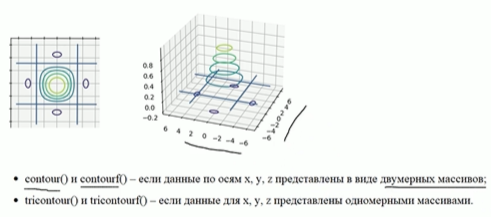

In [44]:
fig = plt.figure()
# ax_3d = Axes3D(fig)
ax_3d = fig.add_subplot(projection='3d')

xgrid = np.arange(-2*np.pi, 2*np.pi, 0.2)
ygrid = np.arange(-2*np.pi, 2*np.pi, 0.2)

xgrid, ygrid = np.meshgrid(x, y)
 
zgrid = np.sin(xgrid) * np.sin(ygrid) / (xgrid * ygrid)
 
ax_3d.contourf(xgrid, ygrid, zgrid) # tri/contour/f

In [45]:
fig, ax = plt.subplots(1, 2)

xgrid = np.arange(-2*np.pi, 2*np.pi, 0.2)
ygrid = np.arange(-2*np.pi, 2*np.pi, 0.2)

xgrid, ygrid = np.meshgrid(x, y)
 
zgrid = np.sin(xgrid) * np.sin(ygrid) / (xgrid * ygrid)
 
c0 = ax[0].contour(xgrid, ygrid, zgrid, 10) # tri/contour/f можно передать список уровней для отображения, colors, cmap
ax[1].contourf(xgrid, ygrid, zgrid) # tri/contour/f

c0.clabel(colors='k', fmt='%.2f') #ax[0].clabel(c0)

<a list of 14 text.Text objects>

# Анимация

In [48]:
x = np.arange(-2*np.pi, 2*np.pi, 0.1)

plt.ion()

for delay in np.arange(0, np.pi, 0.1):
    y = np.cos(x+delay)

    plt.clf()
    plt.plot(x, y)
    plt.draw()
    plt.gcf().canvas.flush_events()
    time.sleep(0.02)


plt.ioff()
plt.show()

In [47]:
plt.ion()

fig, ax = plt.subplots()

x = np.arange(-2*np.pi, 2*np.pi, 0.1)
y = np.cos(x)

line, = ax.plot(x, y)

for delay in np.arange(0, np.pi, 0.1):
    y = np.cos(x+delay)

   
    line.set_ydata(y)
    plt.draw()
    plt.gcf().canvas.flush_events()
    time.sleep(0.02)


plt.ioff()
plt.show()

KeyboardInterrupt: 

In [51]:
def update_cos(frame, line, x):
    line.set_ydata( np.cos(x+frame))
    return [line]


fig, ax = plt.subplots()
x = np.arange(-2*np.pi, 2*np.pi, 0.1)
y = np.cos(x)
line, = ax.plot(x, y)
phasa = np.arange(0, 4*np.pi, 0.1)

animation = FuncAnimation(
    fig, # фигура где отображается анимация
    func=update_cos, # функция обновления
    frames=phasa, # меняющиеся парамется
    fargs=(line, x), # дополнительные параметры для функции обновления
    interval=30, # интервал между кадрами в миллисекундах
    blit=True, # использование двойной буферизации
    repeat=False) # повтор

plt.show()

In [52]:
fig = plt.figure()
ax_3d = fig.add_subplot(projection='3d')

border = 2

x = np.arange(-border*np.pi, border*np.pi, 0.2)
y = np.arange(-border*np.pi, border*np.pi, 0.2)
xgrid, ygrid = np.meshgrid(x, y)

phasa = np.arange(-border*np.pi, border*np.pi, 0.1)
phasa = np.concatenate((phasa,phasa[::-1]))
frames = []
ax_3d.set_xlabel('x')
ax_3d.set_ylabel('y')
ax_3d.set_zlabel('z')

for p in phasa:
    zgrid = np.sin(xgrid+p) * np.sin(ygrid+p) / ((xgrid+p) * (ygrid+p))

    line = ax_3d.plot_surface(xgrid, ygrid, zgrid, cmap='plasma')
    frames.append([line])

animation = ArtistAnimation(
    fig,
    frames,
    interval=30,
    blit=True,
    repeat=True)



plt.show()

# Конец
